<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
# Step 3: Handling Missing Data

# Check how many missing values are in each of the relevant columns
missing_counts = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("Missing values before handling:\n", missing_counts)

# Strategy:
# - Drop rows where 'Employment' or 'JobSat' is missing (assume they're critical)
# - Fill missing 'RemoteWork' with 'NA' (Not Available) as a placeholder

# Drop rows where Employment or JobSat is missing
df = df.dropna(subset=['Employment', 'JobSat'])

# Fill missing RemoteWork with 'NA'
df['RemoteWork'] = df['RemoteWork'].fillna('NA')

# Confirm that missing values are handled
print("\nMissing values after handling:\n", df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

Missing values before handling:
 Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing values after handling:
 Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


C:\Users\rahim\AppData\Local\Temp\ipykernel_14700\886830346.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp['ExperienceRange'] = pd.cut(df_exp['YearsCodePro'], bins=bins, labels=labels, right=False)
C:\Users\rahim\AppData\Local\Temp\ipykernel_14700\886830346.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp['JobSatScore'] = df_exp['JobSat'].map(satisfaction_map)
C:\Users\rahim\AppData\Local\Temp\ipykernel_14700\886830346.py:28: FutureWarning: The default of observed=False is deprecated

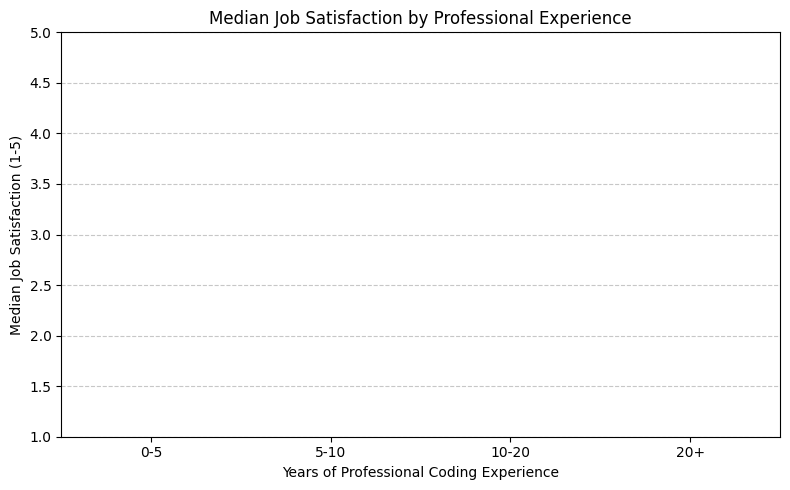

In [4]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure YearsCodePro is numeric, coerce errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with missing YearsCodePro or JobSat
df_exp = df.dropna(subset=['YearsCodePro', 'JobSat'])

# Define experience bins and labels
bins = [0, 5, 10, 20, 100]
labels = ['0-5', '5-10', '10-20', '20+']
df_exp['ExperienceRange'] = pd.cut(df_exp['YearsCodePro'], bins=bins, labels=labels, right=False)

# Map JobSat to numeric scores for median calculation
satisfaction_map = {
    'Very dissatisfied': 1,
    'Dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Satisfied': 4,
    'Very satisfied': 5
}
df_exp['JobSatScore'] = df_exp['JobSat'].map(satisfaction_map)

# Calculate median JobSat for each experience range
median_satisfaction = df_exp.groupby('ExperienceRange')['JobSatScore'].median().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='ExperienceRange', y='JobSatScore', data=median_satisfaction, palette='viridis')
plt.title('Median Job Satisfaction by Professional Experience')
plt.ylabel('Median Job Satisfaction (1-5)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylim(1, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


C:\Users\rahim\AppData\Local\Temp\ipykernel_14700\396134696.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', order=[


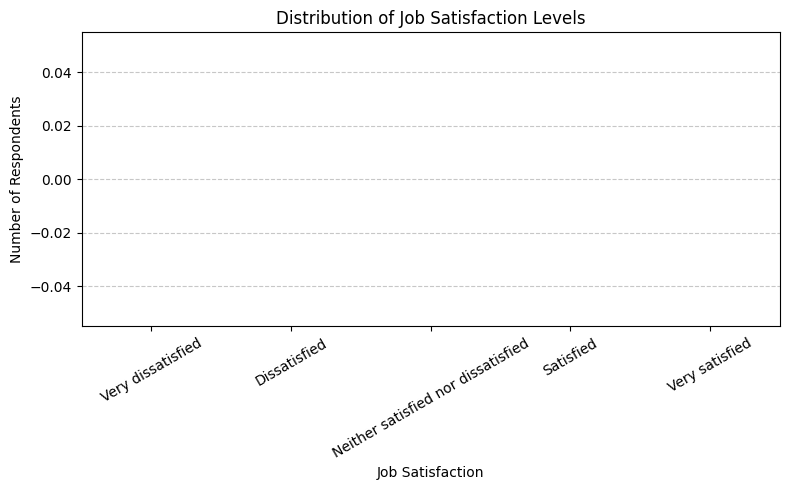

In [5]:
## Write your code here
# Set plot style
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSat', order=[
    'Very dissatisfied', 'Dissatisfied',
    'Neither satisfied nor dissatisfied',
    'Satisfied', 'Very satisfied'
], palette='coolwarm')

plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


C:\Users\rahim\AppData\Local\Temp\ipykernel_14700\2841911739.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, palette='Set2')


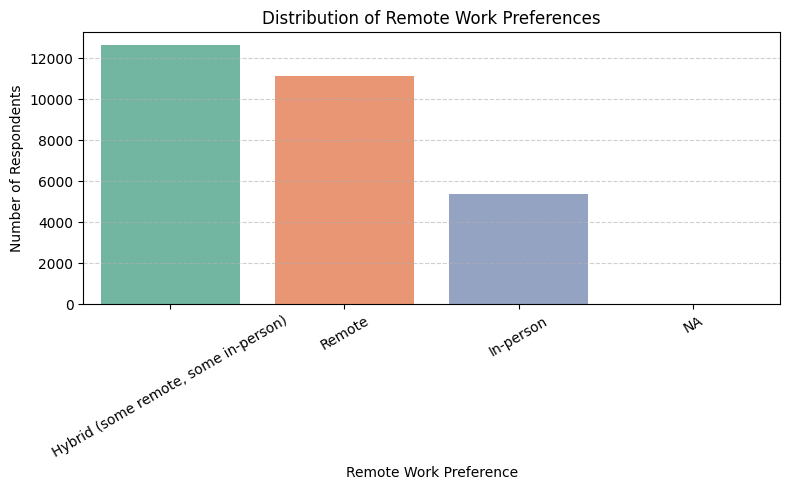


Remote Work Preferences by Employment Type:

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                 9992   
Employed, full-time;Employed, part-time                                               49   
Employed, full-time;Independent contractor, fre...                                   826   
Employed, full-time;Independent contractor, fre...                                    53   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Independent contractor, free...                                     1   
Student, full-time;Not employed, but looking fo...                                     1   
Student, full-time;Not employed, b

In [9]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 6.1: Count plot of RemoteWork
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index, palette='Set2')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# STEP 6.2: Cross-tabulation of RemoteWork by Employment and Job Role

# Ensure necessary columns are present and drop rows with missing data
df_crosstab = df[['RemoteWork', 'Employment', 'DevType']].dropna()

# Cross-tab between Employment and RemoteWork
employment_remote_ct = pd.crosstab(df_crosstab['Employment'], df_crosstab['RemoteWork'])
print("\nRemote Work Preferences by Employment Type:\n")
print(employment_remote_ct)

# Optional: Normalize to see proportions
employment_remote_pct = pd.crosstab(df_crosstab['Employment'], df_crosstab['RemoteWork'], normalize='index')
print("\n(Percentages)\n", employment_remote_pct.round(2))

# DevType may contain multiple roles separated by ';' — explode to count each role separately
df_roles = df_crosstab.copy()
df_roles['DevType'] = df_roles['DevType'].str.split(';')
df_roles = df_roles.explode('DevType')
df_roles['DevType'] = df_roles['DevType'].str.strip()  # remove extra spaces

# Cross-tab between DevType and RemoteWork
role_remote_ct = pd.crosstab(df_roles['DevType'], df_roles['RemoteWork'])

# Check available RemoteWork categories
print("\nRemoteWork Categories:\n", role_remote_ct.columns.tolist())

# Sort by one of the actual columns (replace with one from above if different)
sort_col = role_remote_ct.columns[0]  # use first column for demo
print(f"\nTop 10 Roles Preferring '{sort_col}':\n")
print(role_remote_ct.sort_values(by=sort_col, ascending=False).head(10))

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


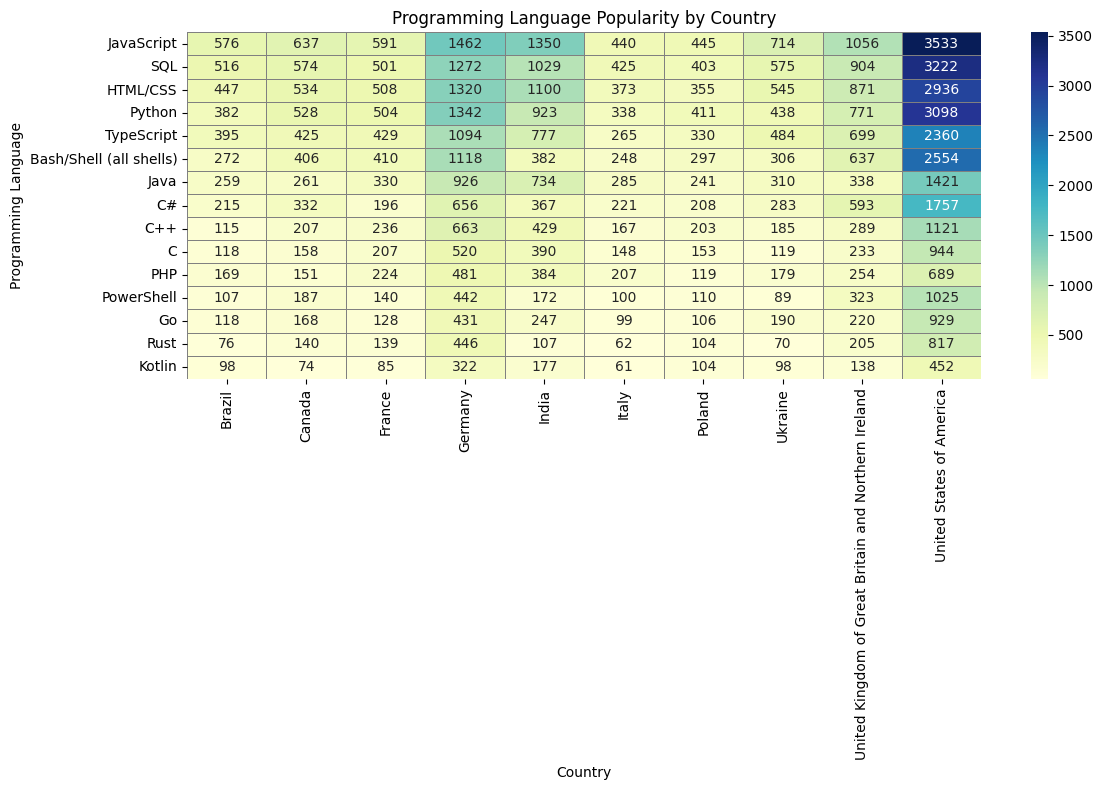

In [10]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 7.1: Prepare and filter data
df_lang = df[['Country', 'LanguageHaveWorkedWith']].dropna()

# Split the languages (semicolon-separated) and explode the rows
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_lang = df_lang.explode('LanguageHaveWorkedWith')
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.strip()  # Clean spaces

# Optional: Focus on top N countries for clarity
top_countries = df_lang['Country'].value_counts().head(10).index
df_lang = df_lang[df_lang['Country'].isin(top_countries)]

# STEP 7.2: Count occurrences of each language per country
lang_counts = df_lang.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# Pivot for heatmap
lang_pivot = lang_counts.pivot(index='LanguageHaveWorkedWith', columns='Country', values='Count').fillna(0)

# Optional: Focus on top N languages overall
top_languages = lang_pivot.sum(axis=1).sort_values(ascending=False).head(15).index
lang_pivot = lang_pivot.loc[top_languages]

# STEP 7.3: Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(lang_pivot, cmap='YlGnBu', linewidths=0.5, linecolor='gray', annot=True, fmt='.0f')
plt.title('Programming Language Popularity by Country')
plt.xlabel('Country')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


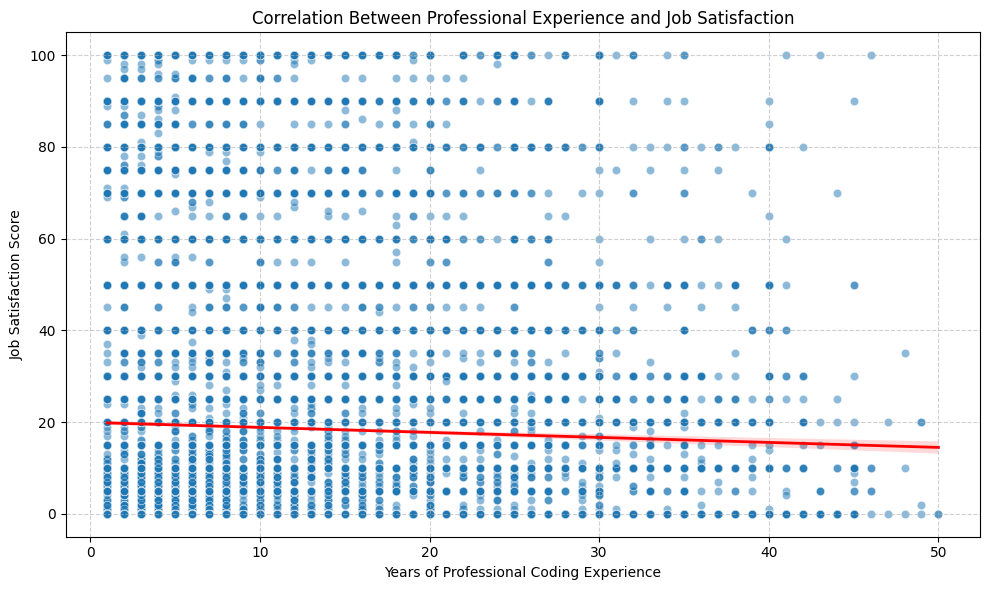

In [11]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# STEP 8.1: Convert 'YearsCodePro' to numeric
def convert_years(val):
    if pd.isna(val):
        return None
    if val == "Less than 1 year":
        return 0.5
    if val == "More than 50 years":
        return 51
    try:
        return float(val)
    except:
        return None

df['YearsCodeProNum'] = df['YearsCodePro'].apply(convert_years)

# STEP 8.2: Drop missing values for plotting
df_plot = df[['YearsCodeProNum', 'JobSatPoints_1']].dropna()

# STEP 8.3: Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='YearsCodeProNum', y='JobSatPoints_1', alpha=0.5)
sns.regplot(data=df_plot, x='YearsCodeProNum', y='JobSatPoints_1', scatter=False, color='red', line_kws={"linewidth": 2})

plt.title('Correlation Between Professional Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.



Cross-tabulation of Education Level vs Employment Type:

Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                 674   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      10497   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                    6731   
Primary/elementary school                                            98   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     1147   
Secondary school (e.g. American high school, Ge...                  891   
Some college/university study without earning a...                 2285   
Something else                                                      214   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
A

C:\Users\rahim\AppData\Local\Temp\ipykernel_14700\2025060561.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


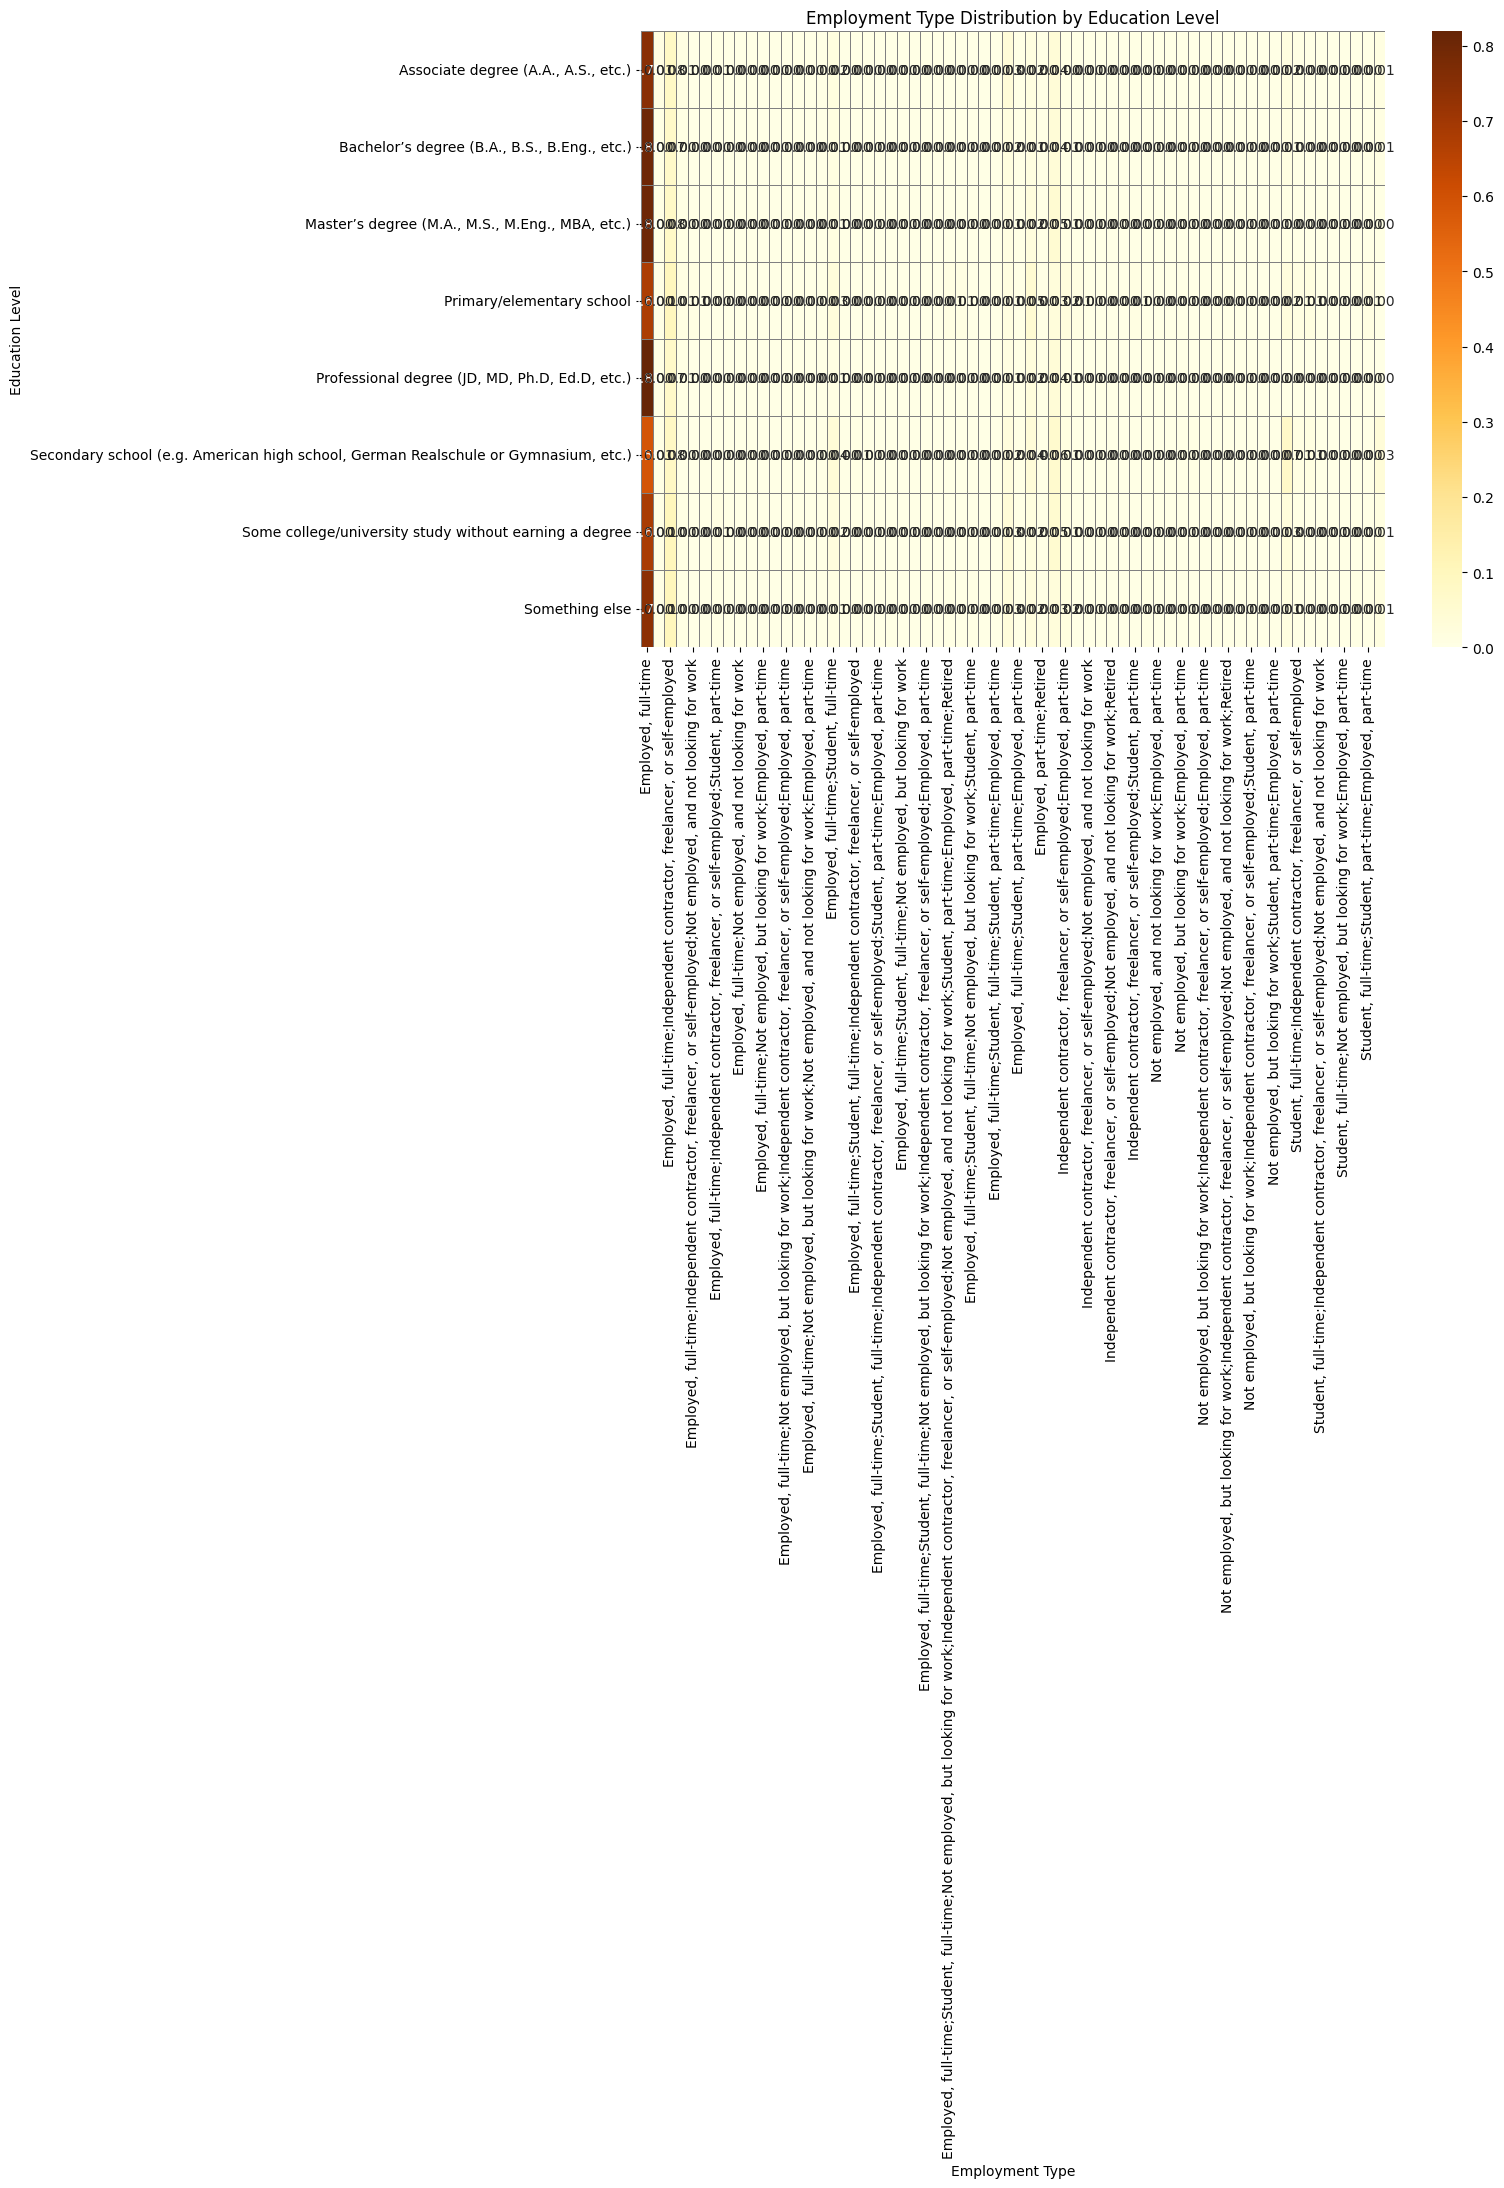

In [12]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 9.1: Drop missing values for relevant columns
df_edu_emp = df[['EdLevel', 'Employment']].dropna()

# STEP 9.2: Cross-tabulate education vs employment
edu_emp_ct = pd.crosstab(df_edu_emp['EdLevel'], df_edu_emp['Employment'])
print("\nCross-tabulation of Education Level vs Employment Type:\n")
print(edu_emp_ct)

# Optional: Normalize by row to get proportions
edu_emp_pct = pd.crosstab(df_edu_emp['EdLevel'], df_edu_emp['Employment'], normalize='index')
print("\n(Percentages)\n", edu_emp_pct.round(2))

# STEP 9.3: Visualization — Heatmap of proportions
plt.figure(figsize=(12, 8))
sns.heatmap(edu_emp_pct, annot=True, fmt=".2f", cmap='YlOrBr', linewidths=0.5, linecolor='gray')
plt.title('Employment Type Distribution by Education Level')
plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [14]:
## Write your code here
df.to_csv("cleaned_survey_data.csv", index=False)
print("✅ CSV file saved as cleaned_survey_data.csv")

✅ CSV file saved as cleaned_survey_data.csv


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
